In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import wandb

wandb.login()
api = wandb.Api()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: gooogleon (gooogleon-uni-hd). Use `wandb login --relogin` to force relogin


In [18]:
NAMES = [
    "Incr",
    "Incr_OV",
    "Incr_Gen_Base",
    "Incr_Gen_Base_OV",
    "Incr_Gen_MRTE",
    "Incr_Gen_MRTE_OV",
    "Incr_Gen_Cap",
    "Incr_Gen_Cap_OV",
    "Incr_Gen_Cap_Large",
    "Incr_Gen_Cap_Large_OV",
]

In [3]:
os.chdir("/home/thesis/marx/wilson_gen/WILSON")

In [4]:
# CLEAN UP ALL RUNS NOT LISTED IN WANDB HOMEPAGE

# run_ids = []
# for run in api.runs("WILSON"):
#     run_ids.append(run.id)

# for run in os.listdir("wandb"):
#     if "run-" in run:
#         if run.split("-")[-1] not in run_ids:
#             os.system(f"rm -rf wandb/{run}")

In [5]:
classes = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "dining_table",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted_plant",
    "sheep",
    "sofa",
    "train",
    "tv_monitor",
]

Incr:                    6876
Incr_OV:                 6876
Incr_Gen_Base:          16876
Incr_Gen_Base_OV:       16876
Incr_Gen_MRTE:          16876
Incr_Gen_MRTE_OV:       16876
Incr_Gen_Cap:           10582
Incr_Gen_Cap_OV:        13015
Incr_Gen_Cap_Large:     17994
Incr_Gen_Cap_Large_OV:  19154


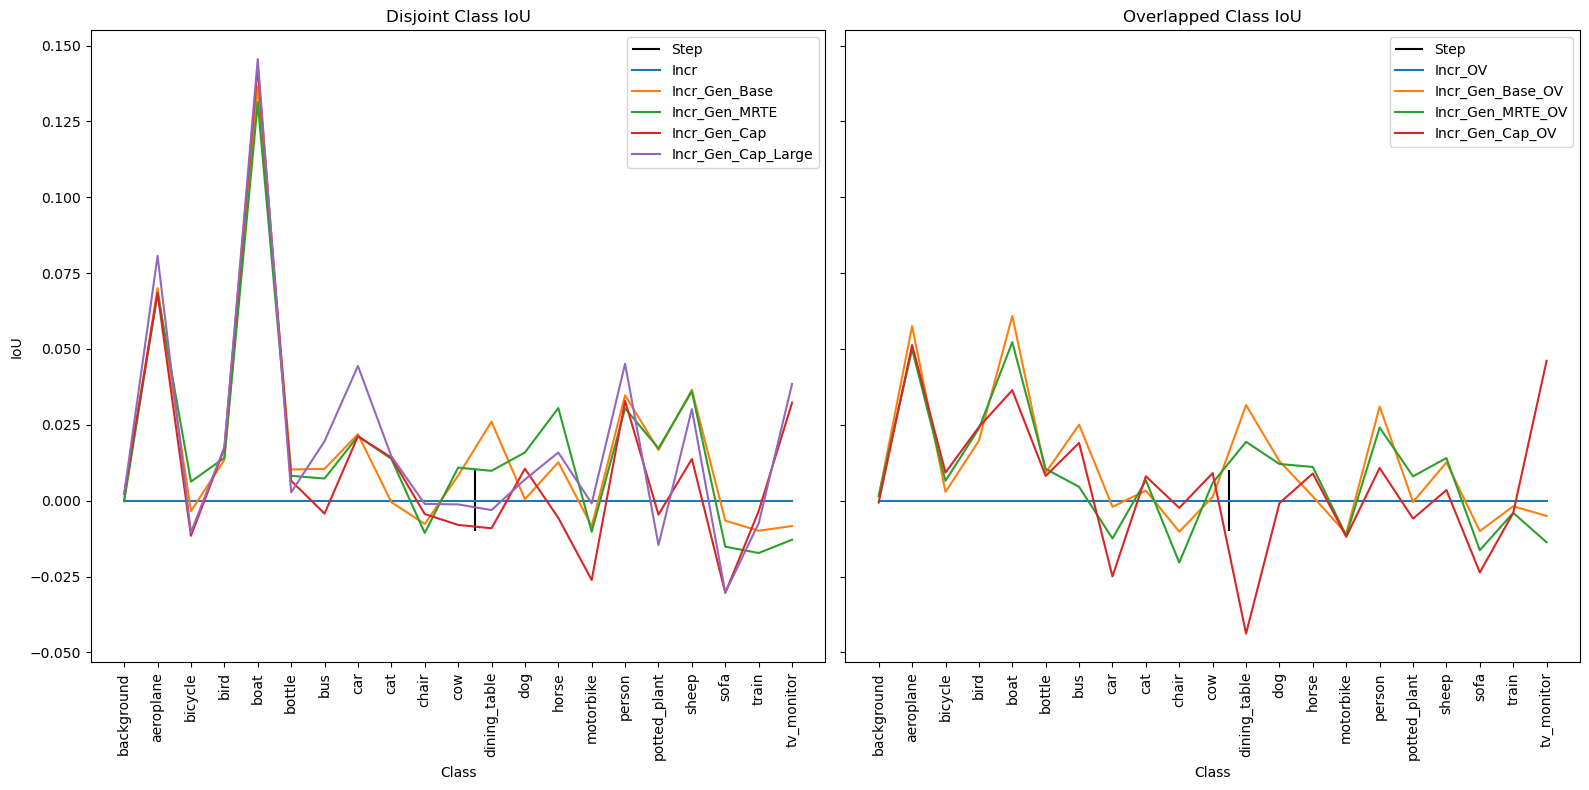

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
# axes[0].vlines(10.5, 0, 1, colors="k", linestyles="dashed", alpha=0.5)
# axes[1].vlines(10.5, 0, 1, colors="k", linestyles="dashed", alpha=0.5)
axes[0].vlines(10.5, -0.01, 0.01, colors="k", label="Step")
axes[1].vlines(10.5, -0.01, 0.01, colors="k", label="Step")
for name in NAMES:
    for run in os.listdir("wandb"):
        if "run-" in run:
            with open(f"wandb/{run}/files/wandb-metadata.json", "r") as f:
                metadata = json.load(f)
            run_name = metadata["args"][metadata["args"].index("--name") + 1]
            if "--overlap" in metadata["args"]:
                run_name += "_OV"
            # print(name, run.split("-")[-1])
            if run_name == name:
                break
    # see amount of training data for each run
    with open(f"wandb/{run}/files/output.log", "r") as f:
        log = f.readlines()[1]
    print(f"{(name + ':').ljust(max([len(n) for n in NAMES]) + 1)} {log.split(':')[4].split(',')[0][1:].rjust(6)}")

    try:
        class_iou_name = os.listdir(f"wandb/{run}/files/media/table/Test/Class_IoU/1/")[0]
        with open(f"wandb/{run}/files/media/table/Test/Class_IoU/1/{class_iou_name}", "r") as f:
            table = json.load(f)
        data = np.array(table["data"][0])
        if name == "Incr":
            baseline = data
        elif name == "Incr_OV":
            baseline_OV = data
        # print(data)
        if "_OV" in name:
            axes[1].plot(np.arange(21), data - baseline_OV, label=name)
        else:
            axes[0].plot(np.arange(21), data - baseline, label=name)
    except FileNotFoundError:
        continue
axes[0].set_xticks(np.arange(21), classes, rotation=90)
axes[0].set_xlabel("Class")
axes[1].set_xticks(np.arange(21), classes, rotation=90)
axes[1].set_xlabel("Class")
axes[0].set_ylabel("IoU")
axes[0].set_title("Disjoint Class IoU")
axes[1].set_title("Overlapped Class IoU")
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()